# Cutting Plane Method

Initial ellipsoid $E^{(0)}=\{y\in\mathbb{R}^n:\ (y-x^{(0)})^{\top}\left(A^{(0)}\right)^{-1}(y-x^{(0)})\leq1\}$

For $k=0,1,\cdots$ do:

If $E^{(k)}$ is small enough or Oracle says YES: Return $x^{(k)}$;

$x^{(k+1)}=x^{(k)}-\frac{1}{n+1}\frac{A^{(k)}g(x^{(k)})}{\sqrt{g(x^{(k)})^{\top}A^{(k)}g(x^{(k)})}}$;

$A^{(k+1)}=\frac{n^{2}}{n^{2}-1}\left(A^{(k)}-\frac{2}{n+1}\frac{A^{(k)}g(x^{(k)})g(x^{(k)})^{\top}A^{(k)}}{g(x^{(k)})^{\top}A^{(k)}g(x^{(k)})}\right)$;


1. 適当な2次関数をランダムに生成する。x^*=(0.5,0.5)となるように凸関数を生成すること。
2. 単位円および、関数値をplt.contourで描画する。
3. E^0が単位円板になるようにx^0=(0,0), A^0=np.eye(2)とセットする。
4. 上記アルゴリズムをk=2まで実行する。
5. x^0, x^1, x^2をplt.plotで描画する。

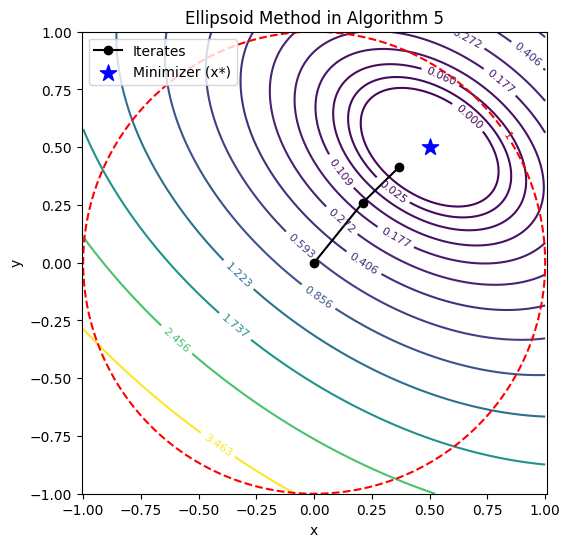

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a convex quadratic function with minimizer x* = (0.5, 0.5)
x_star = np.array([0.5, 0.5])
np.random.seed(42)
M = np.random.rand(2, 2)
Q = M.T @ M + np.eye(2)  # Ensure Q is positive definite


def f(x):
    diff = x - x_star
    return 0.5 * diff.T @ Q @ diff - 0.062


def grad_f(x):
    return Q @ (x - x_star)


# 2. Plot the function contours and the unit circle (x^2 + y^2 = 1)
x_vals = np.linspace(-1, 1, 400)
y_vals = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.empty_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pt = np.array([X[i, j], Y[i, j]])
        Z[i, j] = f(pt)

plt.figure(figsize=(6, 6))
# levels = np.linspace(np.min(Z), np.max(Z), 100)
levels = [np.min(Z)] + [
    (np.max(Z) - np.min(Z)) * 0.01 * (1.4**i) + np.min(Z) for i in range(13)
]
contours = plt.contour(X, Y, Z, levels=levels, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

# Plot unit circle using its implicit equation
circle = plt.contour(X, Y, X**2 + Y**2, levels=[1], colors="red", linestyles="--")
plt.clabel(circle, inline=True, fontsize=8)

# 3. Initialize E^0 as the unit disc with x^0 = (0,0) and A^0 = I (n=2).
n = 2
x0 = np.array([0.0, 0.0])
A0 = np.eye(2)

# 4. Execute the cutting plane update algorithm for k = 0, 1 (yielding x^1 and x^2)
iterates = [x0]
x_current = x0.copy()
A_current = A0.copy()

for k in range(2):
    g = grad_f(x_current)
    Ag = A_current @ g
    norm_val = np.sqrt(g.T @ A_current @ g)
    x_next = x_current - (1 / (n + 1)) * (Ag / norm_val)
    factor = n**2 / (n**2 - 1)  # For n = 2, factor = 4/3
    A_next = factor * (
        A_current - (2 / (n + 1)) * (np.outer(Ag, Ag) / (g.T @ A_current @ g))
    )
    iterates.append(x_next)
    x_current = x_next
    A_current = A_next

# 5. Plot the iterates x^0, x^1, x^2 on the plot.
iterates = np.array(iterates)
plt.plot(iterates[:, 0], iterates[:, 1], "ko-", label="Iterates")
plt.scatter(
    x_star[0], x_star[1], color="blue", marker="*", s=150, label="Minimizer (x*)"
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ellipsoid Method in Algorithm 5")
plt.legend()
plt.axis("equal")
plt.show()